In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import os
import librosa
import librosa.display
import glob
import skimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dat1, sr = librosa.load('/content/drive/MyDrive/NCFOML/isml/cvisml.m4a')

In [ ]:
dat2, sr2 = librosa.load('/content/drive/MyDrive/NCFOML/isml/bgisml.mp3')
dat3, sr3 = librosa.load('/content/drive/MyDrive/NCFOML/isml/cbisml.mp3')

In [ ]:
bgnoise.shape
cbnoise.shape

(212151,)

In [ ]:

dat2 = dat2[:cbnoise.shape[0]]
dat3 = dat3[:cbnoise.shape[0]]

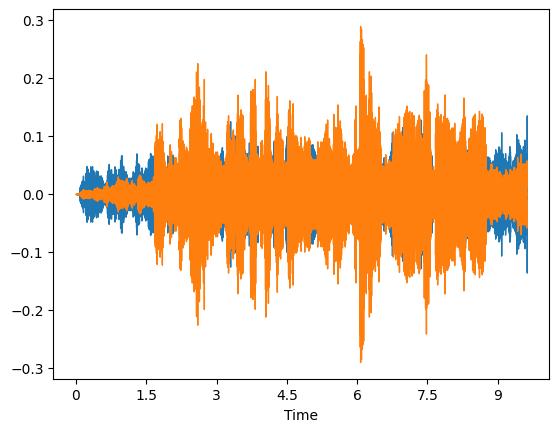

In [ ]:
librosa.display.waveshow(dat2)
librosa.display.waveshow(dat3)

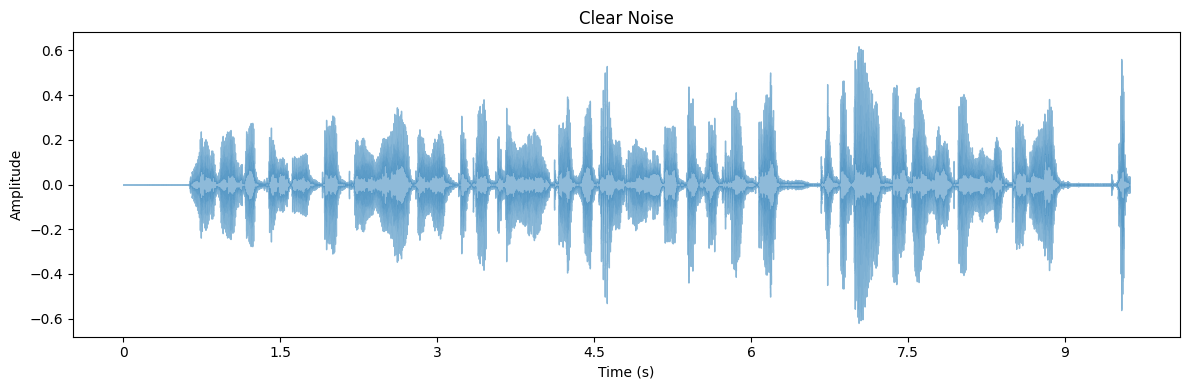

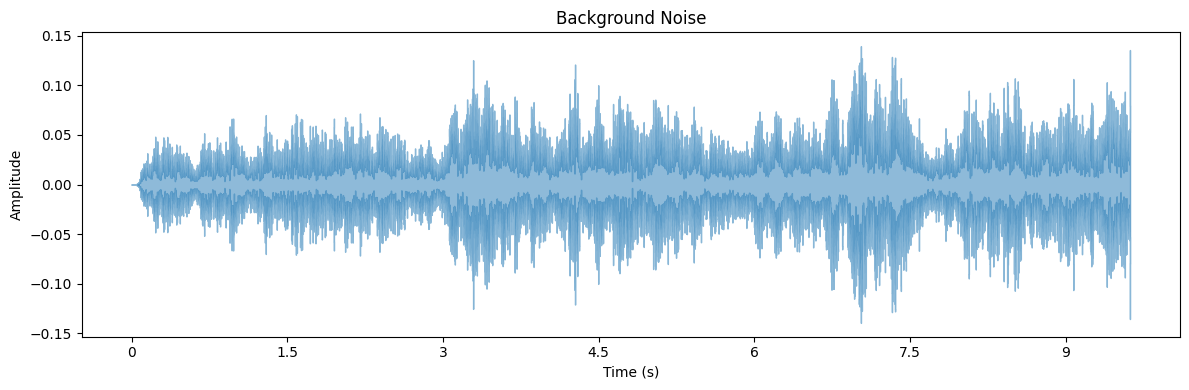

In [ ]:
import librosa.display
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
librosa.display.waveshow(clearnoise, alpha=0.5)
plt.title('Clear Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

plt.figure(figsize=(12, 4))
librosa.display.waveshow(bgnoise, alpha=0.5)
plt.title('Background Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

plt.show()


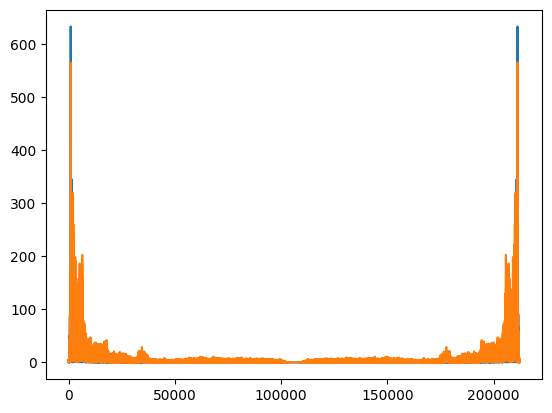

In [ ]:
fft2 = np.fft.fft(dat2)
magnitude2 = np.abs(fft2)
plt.plot(magnitude2)
fft3 = np.fft.fft(dat3)
magnitude3 = np.abs(fft3)
plt.plot(magnitude3)

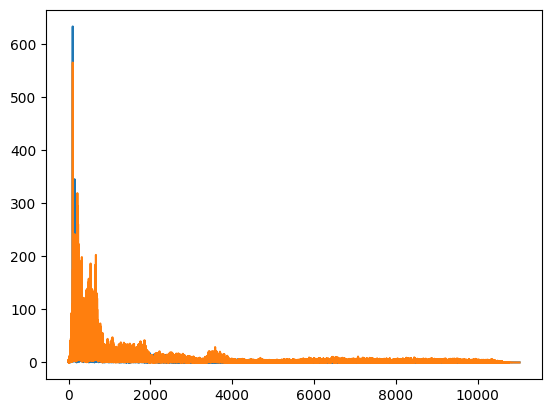

In [ ]:
frequency2 = np.linspace(0,sr,len(magnitude2))
left_freq2 = frequency2[:round(len(frequency2)/2)]
left_mag2 = magnitude2[:round(len(frequency2)/2)]
plt.plot(left_freq2,left_mag2)

frequency3 = np.linspace(0,sr,len(magnitude3))
left_freq3 = frequency3[:round(len(frequency3)/2)]
left_mag3 = magnitude3[:round(len(frequency3)/2)]
plt.plot(left_freq3,left_mag3)

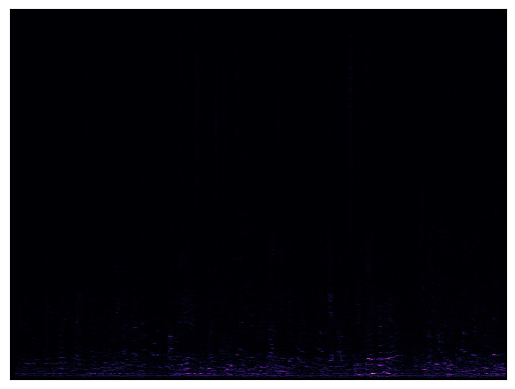

In [ ]:
n_fft = 2048
hop_len = 512
stft2 = librosa.core.stft(dat2,n_fft = 2048,hop_length = hop_len)
spectogram2 = np.abs(stft2)
librosa.display.specshow(spectogram2, sr=sr2, hop_length=hop_len)

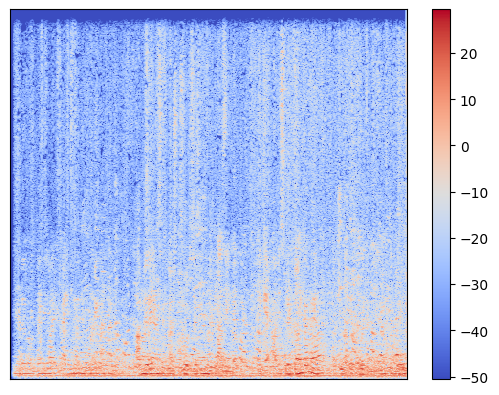

In [ ]:
log_spectogram2 = librosa.amplitude_to_db(spectogram2)
librosa.display.specshow(log_spectogram2, sr=sr2, hop_length=hop_len)
plt.colorbar()

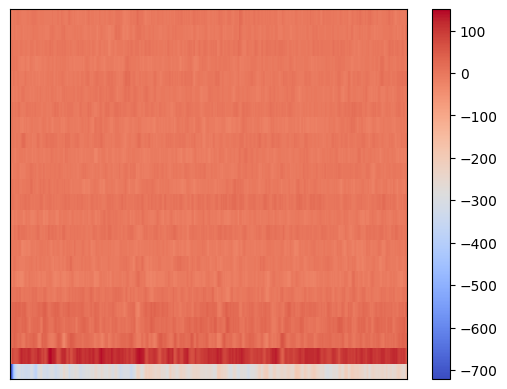

In [ ]:
mfccs2 = librosa.feature.mfcc(y =dat2, sr=sr2, n_mfcc = 24, hop_length = hop_len)
librosa.display.specshow(mfccs2,sr=sr2,hop_length=hop_len)
plt.colorbar()

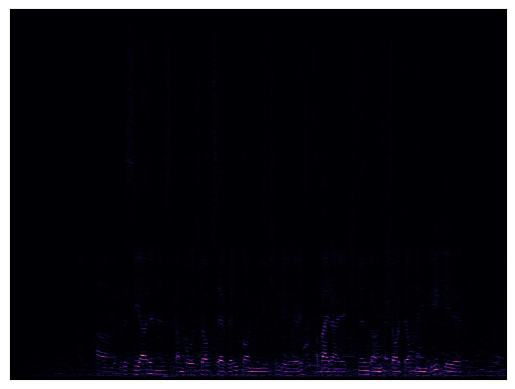

In [ ]:
n_fft = 2048
hop_len = 512
stft3 = librosa.core.stft(dat3,n_fft = 2048,hop_length = hop_len)
spectogram3 = np.abs(stft3)
librosa.display.specshow(spectogram3, sr=sr3, hop_length=hop_len)

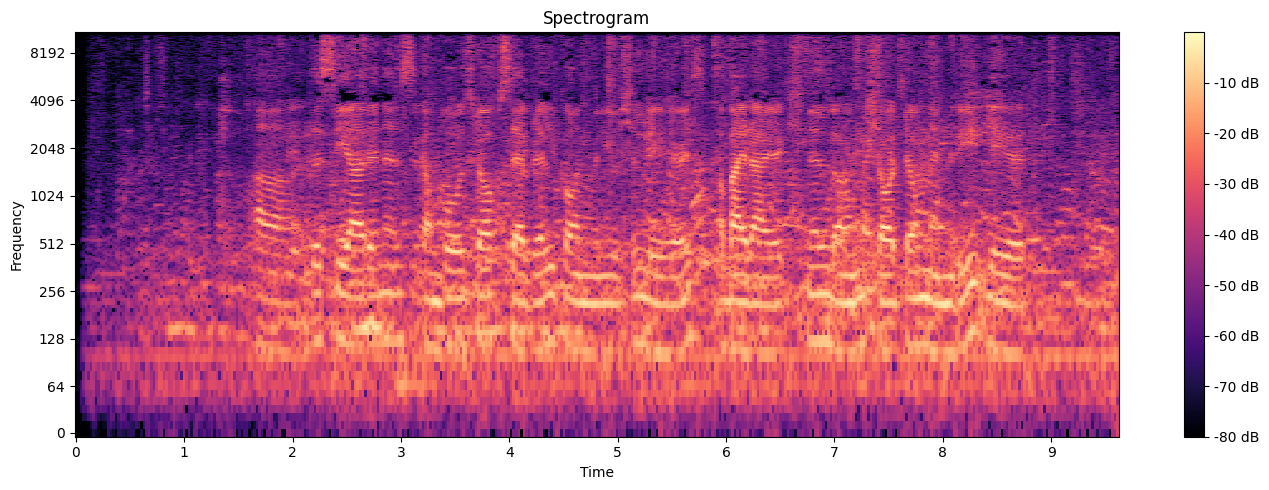

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
stft3 = librosa.core.stft(dat3, n_fft=2048, hop_length=hop_len)

D = librosa.amplitude_to_db(np.abs(stft3), ref=np.max)

plt.figure(figsize=(14, 5))

librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')

plt.colorbar(format='%+2.0f dB')

plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


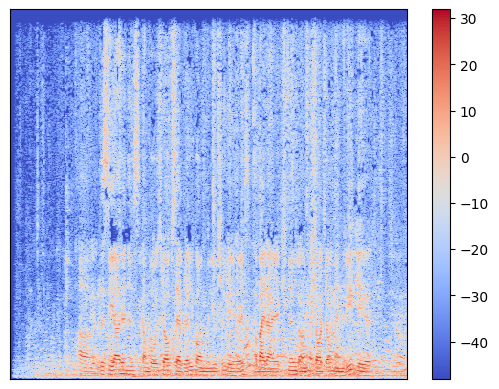

In [ ]:
log_spectogram3 = librosa.amplitude_to_db(spectogram3)
librosa.display.specshow(log_spectogram3, sr=sr3, hop_length=hop_len)
plt.colorbar()

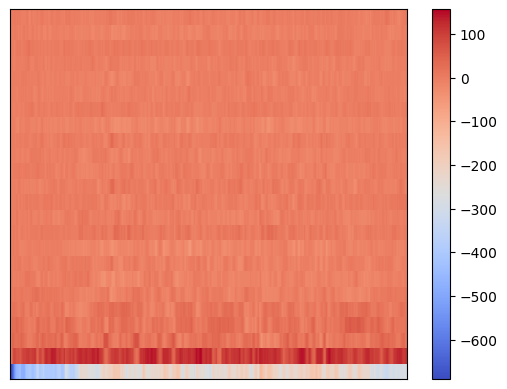

In [ ]:
mfccs3 = librosa.feature.mfcc(y =dat3, sr=sr3, n_mfcc = 24, hop_length = hop_len)
librosa.display.specshow(mfccs3,sr=sr3,hop_length=hop_len)
plt.colorbar()

In [ ]:

"""D_clean = librosa.stft(y_clean)
D_noisy = librosa.stft(y_noisy)
S_clean = np.abs(D_clean)
S_noisy = np.abs(D_noisy)
mask = S_clean / (S_clean + S_noisy)
S_target = mask * S_noisy
y_target = librosa.istft(S_target)"""

clean=np.abs(stft2)
noisy=np.abs(stft3)

mask=noisy/(clean+noisy)

starget=mask*stft3
ytarget=librosa.istft(starget)

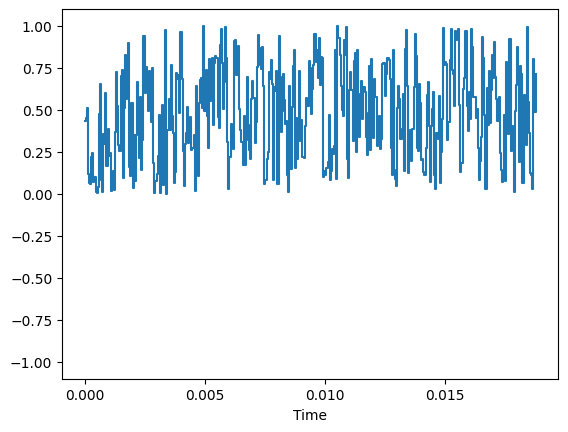

In [ ]:

librosa.display.waveshow(mask)

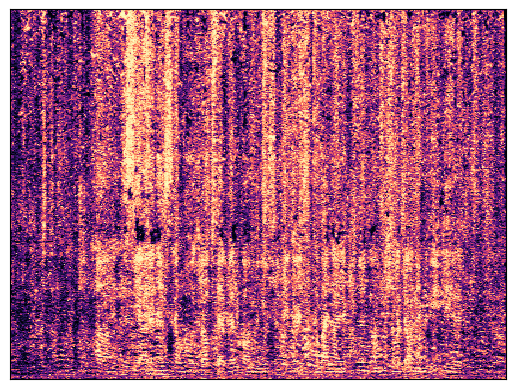

In [ ]:
spectogram_m = np.abs(mask)
librosa.display.specshow(spectogram_m, sr=sr3, hop_length=hop_len)

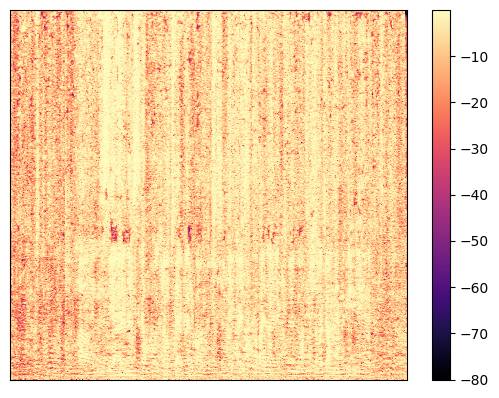

In [ ]:
log_spectogram_m = librosa.amplitude_to_db(spectogram_m)
librosa.display.specshow(log_spectogram_m, sr=sr3, hop_length=hop_len)
plt.colorbar()

In [ ]:
librosa.display.waveshow(dat1)
librosa.display.waveshow(ytarget)


NameError: ignored

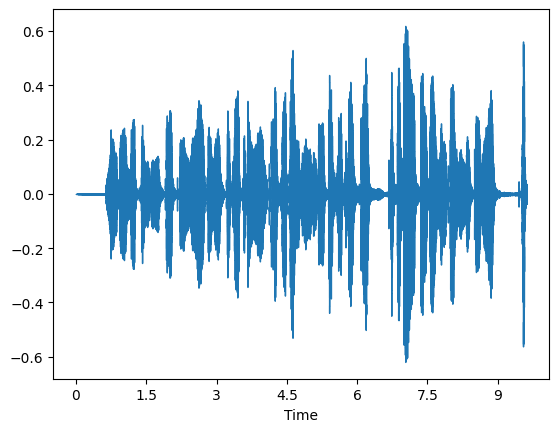

In [ ]:
librosa.display.waveshow(dat1)

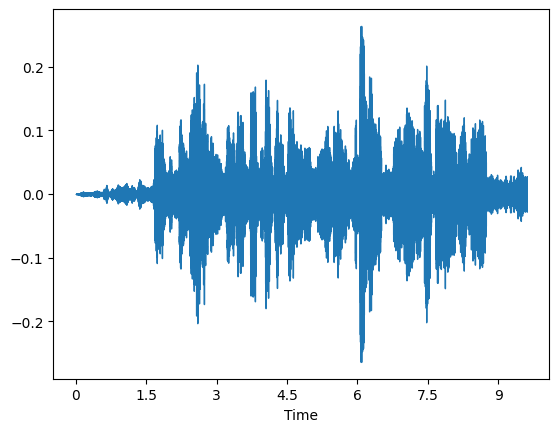

In [ ]:
librosa.display.waveshow(ytarget)

In [ ]:
ytarget = ytarget / np.max(np.abs(ytarget))
import soundfile as sf
sf.write('temp.wav', ytarget, sr)
from pydub import AudioSegment
audio = AudioSegment.from_wav('temp.wav')
audio.export('output3.mp3', format='mp3')

<_io.BufferedRandom name='output3.mp3'>

In [ ]:
!pip install pydub

In [ ]:
import numpy as np
max_peak = np.max(np.abs(clearnoise))
ratio = 1 / max_peak
normalized_data = clearnoise * ratio


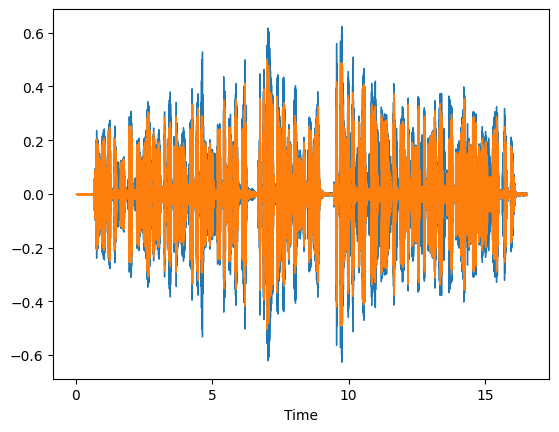

In [ ]:
librosa.display.waveshow(clearnoise)
librosa.display.waveshow(smoothed_signal)

In [ ]:
import numpy as np

def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')
window_size = 10
smoothed_signal = moving_average(clearnoise, window_size)


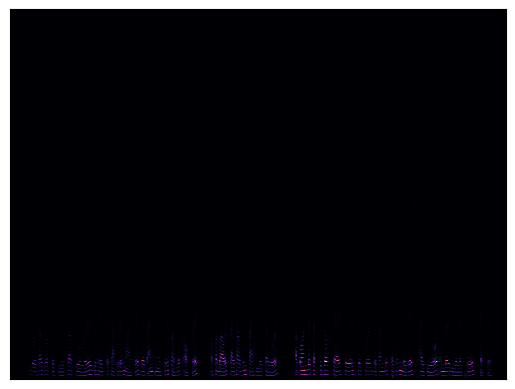

In [ ]:
n_fft = 2048
hop_len = 512
stft = librosa.core.stft(smoothed_signal,n_fft = 2048,hop_length = hop_len)
spectogram = np.abs(stft)
librosa.display.specshow(spectogram, sr=sr, hop_length=hop_len)

In [ ]:
!pip install pydub

In [ ]:
bgnoise, sr2 = librosa.load('/content/drive/MyDrive/NCFOML/background.mp3')
cbnoise, sr3 = librosa.load('/content/drive/MyDrive/NCFOML/combined.mp3')
clearnoise = clearnoise[:cbnoise.shape[0]]
bgnoise = bgnoise[:cbnoise.shape[0]]

In [ ]:
sqrt_cb = np.sqrt(cbnoise)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sqrttrans_cb = scaler.fit_transform(sqrt_cb.reshape(-1, 1))
sqrttrans_cb_df = pd.DataFrame(sqrttrans_cb)
sqrttrans_cb = np.array(sqrttrans_cb_df.interpolate().dropna())
sqrttrans_cb

n_fft = 2048
hop_len = 512
stft_cb = librosa.core.stft(sqrttrans_cb,n_fft = 2048,hop_length = hop_len)
spectogram_cb = np.abs(stft_cb)

<ipython-input-5-842d41841f8c>:1: RuntimeWarning: invalid value encountered in sqrt
  sqrt_cb = np.sqrt(cbnoise)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1
  warnings.warn(


In [ ]:
clearnoise = clearnoise[:cbnoise.shape[0]]
bgnoise = bgnoise[:cbnoise.shape[0]]
# librosa.display.waveshow(clearnoise)
# librosa.display.waveshow(bgnoise)
sqrt_c = np.sqrt(clearnoise)
sqrt_b = np.sqrt(bgnoise)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sqrttrans_c = scaler.fit_transform(sqrt_c.reshape(-1, 1))
sqrttrans_b = scaler.fit_transform(sqrt_b.reshape(-1, 1))

sqrttrans_c_df = pd.DataFrame(sqrttrans_c)
sqrttrans_b_df = pd.DataFrame(sqrttrans_b)
sqrttrans_c = np.array(sqrttrans_c_df.interpolate().dropna())
sqrttrans_b = np.array(sqrttrans_b_df.interpolate().dropna())

n_fft = 2048
hop_len = 512
stft_c = librosa.core.stft(sqrttrans_c,n_fft = 2048,hop_length = hop_len)
spectogram_c = np.abs(stft_c)
#librosa.display.specshow(spectogram_c, sr=sr2, hop_length=hop_len)


<ipython-input-8-b5a2c1506738>:5: RuntimeWarning: invalid value encountered in sqrt
  sqrt_c = np.sqrt(clearnoise)
<ipython-input-8-b5a2c1506738>:6: RuntimeWarning: invalid value encountered in sqrt
  sqrt_b = np.sqrt(bgnoise)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1
  warnings.warn(


In [ ]:
stft_b = librosa.core.stft(sqrttrans_b,n_fft = 2048,hop_length = hop_len)
spectogram_b = np.abs(stft_b)
mask=spectogram_b/(spectogram_c+spectogram_b)

starget=mask*stft_cb
ytarget=librosa.istft(starget)

<ipython-input-23-07581035e115>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  noise_data, rate = librosa.load('/content/drive/MyDrive/NCFOML/atrv/bgatrv.m4a')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-23-07581035e115>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  combined_data, _ = librosa.load('/content/drive/MyDrive/NCFOML/aksh/cbaksh.m4a')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


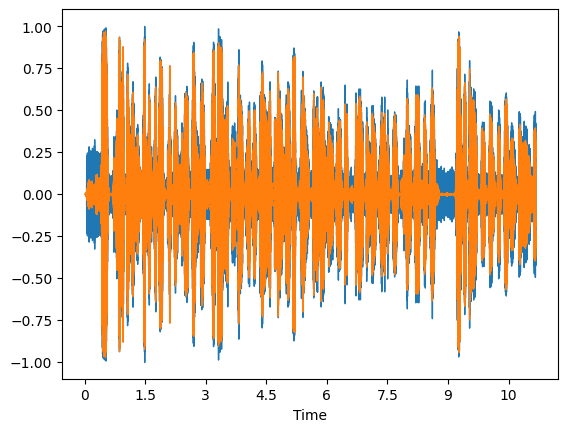

In [ ]:
import numpy as np
import librosa
import soundfile as sf

noise_data, rate = librosa.load('/content/drive/MyDrive/NCFOML/atrv/bgatrv.m4a')
combined_data, _ = librosa.load('/content/drive/MyDrive/NCFOML/aksh/cbaksh.m4a')
D_noise = librosa.stft(noise_data)
S_noise, _ = librosa.magphase(D_noise)
T = np.percentile(S_noise, 95, axis=1, keepdims=True)
D_combined = librosa.stft(combined_data)
S_combined, phase_combined = librosa.magphase(D_combined)
mask = S_combined > T
D_masked = mask * D_combined
y_masked = librosa.istft(D_masked)

#sf.write("masked.wav", y_masked, rate)
librosa.display.waveshow(combined_data)
librosa.display.waveshow(y_masked)

In [ ]:
#y_masked = y_masked / np.max(np.abs(y_masked))
import pydub
import soundfile as sf
sf.write('temp.wav', y_masked, rate)
from pydub import AudioSegment
audio = AudioSegment.from_wav('temp.wav')
audio.export('akshpre.mp3', format='mp3')

<_io.BufferedRandom name='akshpre.mp3'>